<a href="https://colab.research.google.com/github/amalsalilan/DataInsight_Sales_Data_Analysis_and_Visualization_Infosys_Internship_Dec2024/blob/K-Pavitra/Initial_exploration_before_time_series_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #imported necessary libraries
import pandas as pd
import matplotlib.pylab as plt


In [ ]:
df=pd.read_excel('/content/Walmart.xlsx') #imported the dataset

In [ ]:
df

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,OrderDate,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,1,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,2,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,3,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,4,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,Fairfield,95.0,Tony Molinari,Corporate,0.10,1,2015-12-30,50950,Not Specified,35,...,-15.07,West,8395,448.10,2015-12-30,Express Air,4.51,California,13.48,94533
8395,Harker Heights,95.0,Matt Hagelstein,Home Office,0.09,1,2015-12-30,25542,Low,37,...,-18.66,Central,8396,257.46,2015-12-30,Express Air,4.23,Texas,7.28,76543
8396,Riverview,95.0,Theresa Swint,Consumer,0.10,1,2015-12-30,45127,Medium,10,...,-1.29,South,8397,14.15,2015-12-30,Regular Air,0.70,Florida,1.48,33569
8397,Nicholasville,95.0,Maribeth Yedwab,Home Office,0.09,1,2015-12-30,49344,Low,1,...,-745.20,South,8398,803.33,2015-12-30,Regular Air,24.49,Kentucky,832.81,40356


Observation:
We can observe that in this dataset there are 8399 rows and 25 columns

In [ ]:
df.head(5) #displays first 5 records from the dataset


,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,OrderDate,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
0,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,1,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
1,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,2,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,3,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
3,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,4,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
4,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559


In [ ]:
df.tail(5) #displays last 5 records from the dataset

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,OrderDate,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
8394,Fairfield,95.0,Tony Molinari,Corporate,0.10,1,2015-12-30,50950,Not Specified,35,...,-15.07,West,8395,448.10,2015-12-30,Express Air,4.51,California,13.48,94533
8395,Harker Heights,95.0,Matt Hagelstein,Home Office,0.09,1,2015-12-30,25542,Low,37,...,-18.66,Central,8396,257.46,2015-12-30,Express Air,4.23,Texas,7.28,76543
8396,Riverview,95.0,Theresa Swint,Consumer,0.10,1,2015-12-30,45127,Medium,10,...,-1.29,South,8397,14.15,2015-12-30,Regular Air,0.70,Florida,1.48,33569
8397,Nicholasville,95.0,Maribeth Yedwab,Home Office,0.09,1,2015-12-30,49344,Low,1,...,-745.20,South,8398,803.33,2015-12-30,Regular Air,24.49,Kentucky,832.81,40356
8398,Nicholasville,95.0,Maribeth Yedwab,Home Office,0.00,1,2015-12-30,49344,Low,31,...,27.85,South,8399,672.93,2015-12-30,Regular Air,4.00,Kentucky,19.98,40356


In [ ]:
df.info() #basic information related to dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8399 entries, 0 to 8398
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  8399 non-null   object        
 1   Customer Age          7496 non-null   float64       
 2   Customer Name         8399 non-null   object        
 3   Customer Segment      8399 non-null   object        
 4   Discount              8399 non-null   float64       
 5   Number of Records     8399 non-null   int64         
 6   OrderDate             8399 non-null   datetime64[ns]
 7   Order ID              8399 non-null   int64         
 8   Order Priority        8399 non-null   object        
 9   Order Quantity        8399 non-null   int64         
 10  Product Base Margin   8336 non-null   float64       
 11  Product Category      8399 non-null   object        
 12  Product Container     8399 non-null   object        
 13  Product Name      

<Axes: >

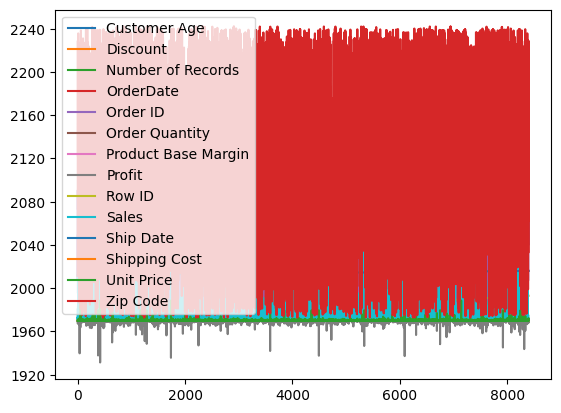

In [ ]:
df.plot() #It shows the visualization of the all the attributes in our dataset

<Axes: xlabel='OrderDate'>

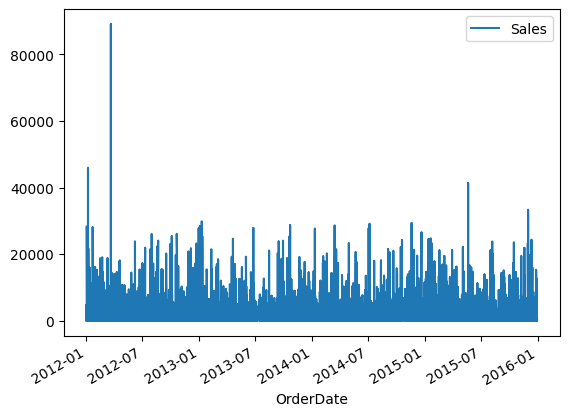

In [ ]:
df.plot(x='OrderDate', y='Sales') #plot between OrderDate and sales

This is plotting of graph based on sales .In this case we can see the sales are fluctuating continuously.

In [ ]:
pd.to_datetime(df['OrderDate'], format='%d-%m-%Y') #initially the date time format was in object here converted to datetime format

,OrderDate
0,2012-01-01
1,2012-01-01
2,2012-01-02
3,2012-01-02
4,2012-01-02
...,...
8394,2015-12-30
8395,2015-12-30
8396,2015-12-30
8397,2015-12-30


In [ ]:
df.set_index(df['OrderDate']) #kept index as date for better visualization

,City,Customer Age,Customer Name,Customer Segment,Discount,Number of Records,OrderDate,Order ID,Order Priority,Order Quantity,...,Profit,Region,Row ID,Sales,Ship Date,Ship Mode,Shipping Cost,State,Unit Price,Zip Code
OrderDate,,,,,,,,,,,,,,,,,,,,,
2012-01-01,McKeesport,NaN,Jessica Myrick,Small Business,0.10,1,2012-01-01,28774,High,32,...,-111.80,East,1,180.36,2012-01-02,Regular Air,4.69,Pennsylvania,5.98,15131
2012-01-01,Bowie,NaN,Matt Collister,Home Office,0.08,1,2012-01-01,13729,Not Specified,9,...,-342.91,East,2,872.48,2012-01-03,Express Air,35.00,Maryland,95.99,20715
2012-01-02,Napa,NaN,Alan Schoenberger,Corporate,0.00,1,2012-01-02,37537,Low,4,...,-193.08,West,3,1239.06,2012-01-02,Delivery Truck,48.80,California,291.73,94559
2012-01-02,Montebello,NaN,Elizabeth Moffitt,Consumer,0.08,1,2012-01-02,44069,Critical,43,...,247.79,West,4,614.80,2012-01-02,Regular Air,1.97,California,15.04,90640
2012-01-02,Napa,NaN,Alan Schoenberger,Corporate,0.07,1,2012-01-02,37537,Low,43,...,-1049.85,West,5,4083.19,2012-01-04,Delivery Truck,45.00,California,100.98,94559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-12-30,Fairfield,95.0,Tony Molinari,Corporate,0.10,1,2015-12-30,50950,Not Specified,35,...,-15.07,West,8395,448.10,2015-12-30,Express Air,4.51,California,13.48,94533
2015-12-30,Harker Heights,95.0,Matt Hagelstein,Home Office,0.09,1,2015-12-30,25542,Low,37,...,-18.66,Central,8396,257.46,2015-12-30,Express Air,4.23,Texas,7.28,76543
2015-12-30,Riverview,95.0,Theresa Swint,Consumer,0.10,1,2015-12-30,45127,Medium,10,...,-1.29,South,8397,14.15,2015-12-30,Regular Air,0.70,Florida,1.48,33569


In [ ]:
from datetime import datetime

In [ ]:
df['Sales'].describe() #tells the insights of Sales column like mean,standard deviation

,Sales
count,8399.000000
mean,1775.878179
std,3585.050525
min,2.240000
25%,143.195000
50%,449.420000
75%,1709.320000
max,89061.050000



Smoothing a time series is a technique used to reduce noise and fluctuations in the data, making it easier to identify trends and patterns.
 Moving Average:
 average of a fixed number of previous data points.




In [ ]:
df_mean=df['Sales'].rolling(window=6).mean() #finding rolling mean for 6 months

In [ ]:
df_mean


,Sales
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
8394,619.088333
8395,631.698333
8396,604.706667
8397,415.853333


<Axes: >

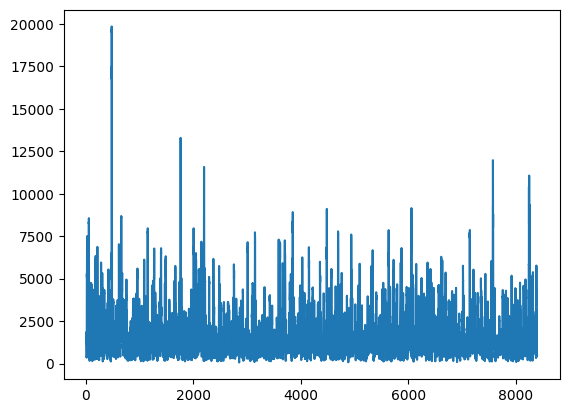

In [ ]:
df_mean.plot()

Using Z score detected outliers in the dataset
mean = data.mean()
std_dev = data.std()
zscore=(data - mean) / std_dev

In [ ]:
import pandas as pd
import numpy as np


data_set = df['Sales']


def calculate_z_scores(data):
    mean = data.mean()
    std_dev = data.std()
    return (data - mean) / std_dev

z_scores = calculate_z_scores(data_set)


def detect_outliers(z_scores, threshold=1):
    return df[np.abs(z_scores) > threshold]


outliers = detect_outliers(z_scores)


print("Outliers detected:")
print(outliers)

Outliers detected:
                 City  Customer Age     Customer Name Customer Segment  \
17        Baton Rouge           NaN       Andy Reiter        Corporate   
21            Bedford           NaN       Darren Budd         Consumer   
26             Norman           NaN     Pauline Chand   Small Business   
37          Galesburg           NaN        Julia West      Home Office   
52    Franklin Square           NaN   Jasper Cacioppo      Home Office   
...               ...           ...               ...              ...   
8327     Lincoln Park          79.0   Ricardo Emerson        Corporate   
8342        Bountiful          81.0     Harold Pawlan   Small Business   
8364        Deer Park          86.0      Anthony Witt        Corporate   
8382        Tonawanda          86.0       Alan Haines         Consumer   
8386     New Rochelle          88.0  Logan Haushalter        Corporate   

      Discount  Number of Records  OrderDate  Order ID Order Priority  \
17        0.05     

Outliers Detection

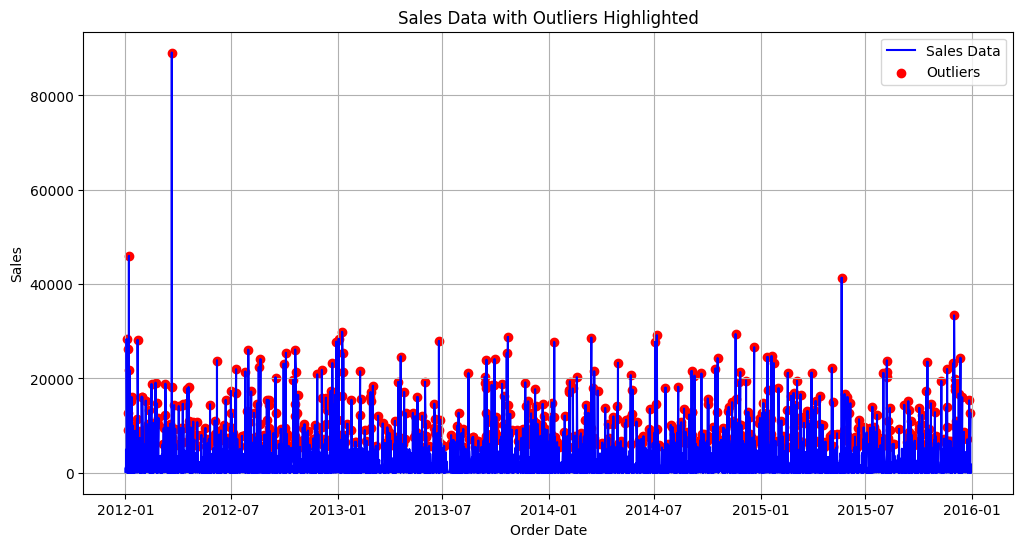

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['OrderDate'],data_set, label='Sales Data', color='blue')
plt.scatter(outliers['OrderDate'], outliers['Sales'], color='red', label='Outliers')
plt.title('Sales Data with Outliers Highlighted')
plt.xlabel('Order Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()